In [38]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from transformers import AutoTokenizer
import torch
pd.set_option('display.max_columns', None)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/28chanjayden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/28chanjayden/Desktop/Astor Perkins Project Human/Personal-ai-agent/personal-ai-agent-training/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# read the dataset
goemotions_df = pd.read_csv("../../personal-ai-agent-training/data/raw/goemotions.csv")


In [19]:
goemotions_df.head(10) #first 10 rows of the dataset

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,1.548764e+09,73,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,1.546984e+09,54,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
goemotions_df.describe() #only numerical columns are 'text_id' and 'comment_id'

,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,2.112250e+05,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000,211225.000000
mean,1.547659e+09,37.619742,0.081103,0.043768,0.038272,0.064472,0.083418,0.028401,0.034840,0.045885,0.018071,0.040095,0.054085,0.025096,0.011722,0.026649,0.015136,0.055036,0.003186,0.037794,0.038779,0.008569,0.041259,0.006164,0.041591,0.006102,0.011954,0.031994,0.026105,0.261797
std,7.696842e+05,23.070528,0.272994,0.204580,0.191853,0.245592,0.276514,0.166116,0.183374,0.209236,0.133208,0.196182,0.226185,0.156418,0.107632,0.161057,0.122092,0.228051,0.056356,0.190698,0.193067,0.092172,0.198890,0.078269,0.199653,0.077880,0.108679,0.175985,0.159448,0.439614
min,1.546301e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546993e+09,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.547664e+09,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.548320e+09,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.548979e+09,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
goemotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [22]:
#-------------------------------------------------------------------
# Check for missing values
#-------------------------------------------------------------------
goemotions_df.isnull().sum()
#no missing values in dataset


text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [23]:
#-------------------------------------------------------------------
# schema enforcement
#-------------------------------------------------------------------
#checking duplicate rows
duplicates = goemotions_df.duplicated()
duplicates.sum() # no duplicate rows

np.int64(0)

In [24]:
#-------------------------------------------------------------------
# Converting dtype of emotion columns to boolean
#-------------------------------------------------------------------
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval", "disgust",
    "embarrassment", "excitement", "fear", "gratitude", "grief", "joy", "love",
    "nervousness", "optimism", "pride", "realization", "relief", "remorse",
    "sadness", "surprise", "neutral"
]

goemotions_df[emotion_columns] = goemotions_df[emotion_columns].astype(bool)

In [28]:

#-------------------------------------------------------------------
#unclear examples
#-------------------------------------------------------------------
#shape of the dataframe with unclear examples
goemotions_df[goemotions_df['example_very_unclear'] == True].shape

#removing the unclear examples
goemotions_df_cleaned = goemotions_df[goemotions_df['example_very_unclear'] != True]

In [29]:
#-------------------------------------------------------------------
# emotion_categories greatest to least common
#-------------------------------------------------------------------
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval", "disgust",
    "embarrassment", "excitement", "fear", "gratitude", "grief", "joy", "love",
    "nervousness", "optimism", "pride", "realization", "relief", "remorse",
    "sadness", "surprise", "neutral"
]
goemotions_df[emotion_columns].sum().sort_values(ascending = False)

neutral           55298
approval          17620
admiration        17131
annoyance         13618
gratitude         11625
disapproval       11424
curiosity          9692
amusement          9245
realization        8785
optimism           8715
disappointment     8469
love               8191
anger              8084
joy                7983
confusion          7359
sadness            6758
caring             5999
excitement         5629
surprise           5514
disgust            5301
desire             3817
fear               3197
remorse            2525
embarrassment      2476
nervousness        1810
pride              1302
relief             1289
grief               673
dtype: int64

<BarContainer object of 28 artists>

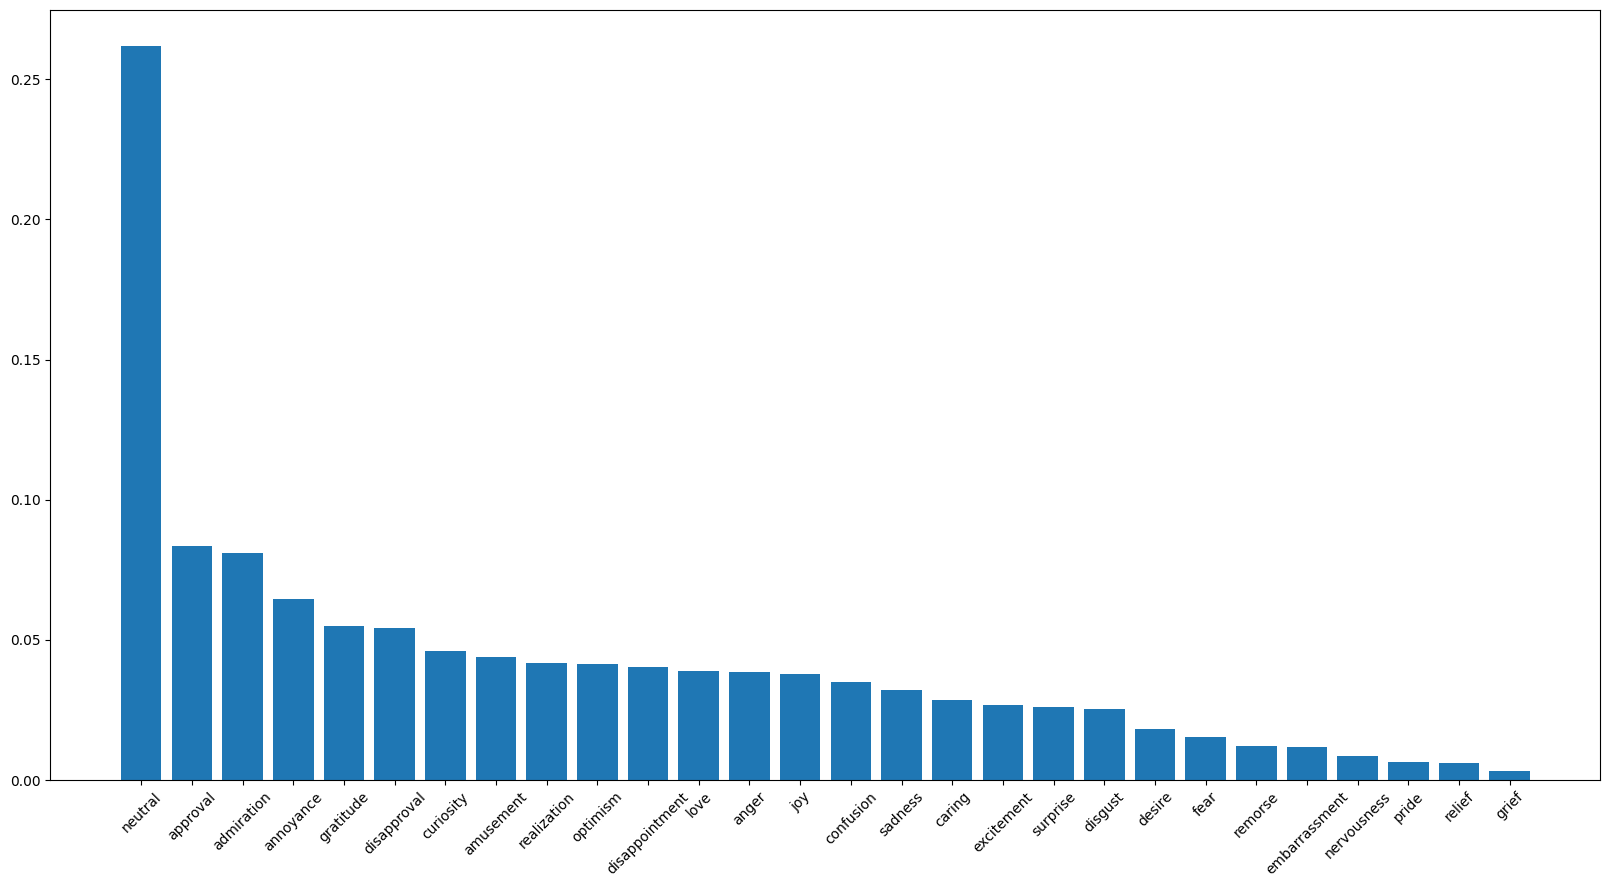

In [32]:
#-------------------------------------------------------------------
# proportion of emmotions by each catagory
#-------------------------------------------------------------------
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval", "disgust",
    "embarrassment", "excitement", "fear", "gratitude", "grief", "joy", "love",
    "nervousness", "optimism", "pride", "realization", "relief", "remorse",
    "sadness", "surprise", "neutral"
]
emotions_prop = (goemotions_df[emotion_columns].sum()/len(goemotions_df)).sort_values(ascending=False)

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(x=emotions_prop.index, height=emotions_prop.values)


# seems to be some class imbalance, def need to apply some smote techniques
# tune threshold
# consider ensemble methods to capture and learn patterns of lower frequency emotions



In [37]:

# -------------------------------------------------------------------
# Cleaning and preprocessing texts columns
# -------------------------------------------------------------------
stop_words = set(stopwords.words('english'))


URL_RE  = re.compile(r'https?://\S+|www\.\S+')
USER_RE = re.compile(r'@\w+')
SUB_RE  = re.compile(r'\br/\w+')

def clean_text(text):
    text = URL_RE.sub(' <URL> ', text) #replaces URLs with <URL>
    text = USER_RE.sub(' <USER> ', text) #replaces user mentions with <USER>
    text = SUB_RE.sub(' <SUBREDDIT> ', text) #replaces subreddit mentions with <SUBREDDIT>
    text = text.replace('\n', ' ') #replaces newlines with space
    text = text.replace('\t', ' ') #replaces tabs with space
    text = text.strip() #removes leading and trailing spaces
    text = re.sub(r'\s+', ' ', text) #removes multiple spaces
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    text = ' '.join(tokens)
    return text

goemotions_df['text'] = goemotions_df['text'].apply(clean_text)


In [40]:

#tokenizer for hugging face models (eg. BERT/DistilBERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") # offical tokenizer for hugging face 
goemotions_tokens = tokenizer(goemotions_df['text'].tolist(), padding="max_length", truncation=True, return_tensors="pt")
goemotions_tokens

{'input_ids': tensor([[  101,  2208,  3480,  ...,     0,     0,     0],
        [  101, 13798,  5807,  ...,     0,     0,     0],
        [  101,  2157,  2123,  ...,     0,     0,     0],
        ...,
        [  101,  3504,  6429,  ...,     0,     0,     0],
        [  101, 17473,  7564,  ...,     0,     0,     0],
        [  101, 15363,  4957,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}